In [1]:
import numpy as np
import scipy
import math
from matplotlib import pyplot as plt
import random

In [2]:
p = 0.2 + 0.6*random.random()

In [3]:
p

0.32526941359911465

In [4]:
r = []
for i in range(10000):
    r.append(0.2 + 0.6*random.random())

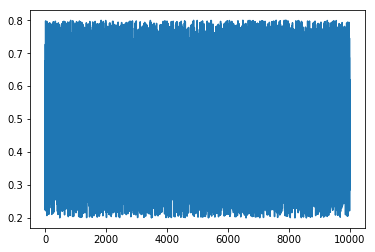

In [5]:
plt.plot(r)
plt.show()

Vamos construir uma função que gera grafos não direcionados com loops

In [12]:
def sorteia_grafo(n, p):
    grafo = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            u = random.random()
            if(u < p):
                grafo[i][j] = 1
                grafo[j][i] = 1
    return grafo

In [13]:
grafo = sorteia_grafo(5, p)

In [14]:
grafo

array([[1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0.]])

In [94]:
def C(G, v, w, n, caminho, passos_caminho):
    #print("=============")
    #print("Vertice Atual: ", v)
    #print("Objetivo: ", w)
    #print("Caminho: ", caminho)
    #print("Passos: ", passos_caminho)
    if v == w:
        if passos_caminho == 0 and G[v][v] == 1:
            return 1
        elif passos_caminho > 0:
            return passos_caminho
    
    fila = []
    for j in range(n):
        if G[v][j] == 1 and j != v:
            if j not in caminho or j == w:
                fila.append(j)
    
    #print("Fila: ", fila)
    
    if v != w:
        if len(fila) == 0:
            return math.inf
    elif passos_caminho != 0:
        return passos_caminho
            
    caminhos = []
    caminho.append(0)
    for vertice in fila:
        #print("CAMINHOOOO, pré trick: ", caminho)
        caminho = caminho[:-1]
        caminho.append(vertice)
        #print("CAMINHOOOO: ", caminho)
        #print("PROFUNDIDADE: ", passos_caminho, "\n")
        cam = caminho[:]
        c = C(G, vertice, w, n, cam, passos_caminho + 1)
        caminhos.append(c)
    
    #print("\nCaminhos: ", caminhos)
    return np.min(caminhos)    

In [39]:
grafo

array([[1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0.]])

In [100]:
print('Resultado: ', C(grafo, 1, 0, 5, [1], 0))

Resultado:  3.0


In [107]:
for i in range(len(grafo)):
    for j in range(i, len(grafo)):
        print("==============")
        print("(",i,",",j,")")
        print('Resultado: ', C(grafo, i, j, len(grafo), [i], 0))

( 0 , 0 )
Resultado:  1
( 0 , 1 )
Resultado:  3.0
( 0 , 2 )
Resultado:  2.0
( 0 , 3 )
Resultado:  2.0
( 0 , 4 )
Resultado:  1
( 1 , 1 )
Resultado:  2.0
( 1 , 2 )
Resultado:  1
( 1 , 3 )
Resultado:  3.0
( 1 , 4 )
Resultado:  2
( 2 , 2 )
Resultado:  2.0
( 2 , 3 )
Resultado:  2.0
( 2 , 4 )
Resultado:  1.0
( 3 , 3 )
Resultado:  2.0
( 3 , 4 )
Resultado:  1
( 4 , 4 )
Resultado:  2.0
